<a href="https://colab.research.google.com/github/g-twombly/FSRI-Research/blob/master/eleanorTOI1130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install eleanor

     |████████████████████████████████| 6.1MB 2.9MB/s 
     |████████████████████████████████| 983kB 41.8MB/s 
     |████████████████████████████████| 2.1MB 46.0MB/s 
     |████████████████████████████████| 6.5MB 44.7MB/s 
     |████████████████████████████████| 109.2MB 35kB/s 
     |████████████████████████████████| 25.9MB 63.5MB/s 
     |████████████████████████████████| 256kB 46.8MB/s 
     |████████████████████████████████| 491kB 45.8MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 3.2MB 46.9MB/s 
     |████████████████████████████████| 2.7MB 45.1MB/s 
  Created wheel for eleanor: filename=eleanor-1.0.5-py2.py3-none-any.whl size=141060 sha256=6f5ec5285d1b2d8236a0eb0097f2bedf5c6b0544755f4df094bed313ed9d0f2c
  Stored in directory: /root/.cache/pip/wheels/a9/cd/bf/44aaaedb1786337c370b0b920f13e5bf3079430e129578c55d
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=30ff327158d02ebde2c505a754

In [2]:
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [5]:
star = eleanor.Source(tic=254113311, sector=13)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 13...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Target Acquired
Cadences Calculated
Quality Flags Assured
CBVs Made
Success! Sector 13 now available.
Found TIC 254113311 (Gaia 6715688452614516736), with TESS magnitude 10.1429, RA 286.375931663504, and Dec -41.4375228598884


In [7]:
star = eleanor.Source(tic=254113311, sector=13)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

coords = (286.375931663504, -41.4375228598884)
# or
coords = SkyCoord(ra=286.375931663504, dec=-41.4375228598884, unit=(u.deg, u.deg))

star = eleanor.Source(coords=coords, sector=13)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

star = eleanor.Source(gaia=6715688452614516736, sector=13)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

INFO: Found cached file /root/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0013-1-2-cal-0314-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0013-1-2-cal-0314-1996_tess_v2_bkg.fits with expected size 81293760. [astroquery.query]
INFO: Found cached file /root/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0013-1-2-cal-0314-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0013-1-2-cal-0314-1996_tess_v2_pc.fits with expected size 162702720. [astroquery.query]
INFO: Found cached file /root/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0013-1-2-cal-0314-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0013-1-2_tess_v2_pm.txt with expected size 245376. [astroquery.query]
Found TIC 254113311 (Gaia 6715688452614516736), with TESS magnitude 10.1429, RA 286.375931663504, and Dec -41.4375228598884
INFO: Found cached file /root/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0013-1-2-cal-0314-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0013-1-2-c

In [8]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors=None)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]




100%|██████████| 1320/1320 [00:27<00:00, 48.52it/s]


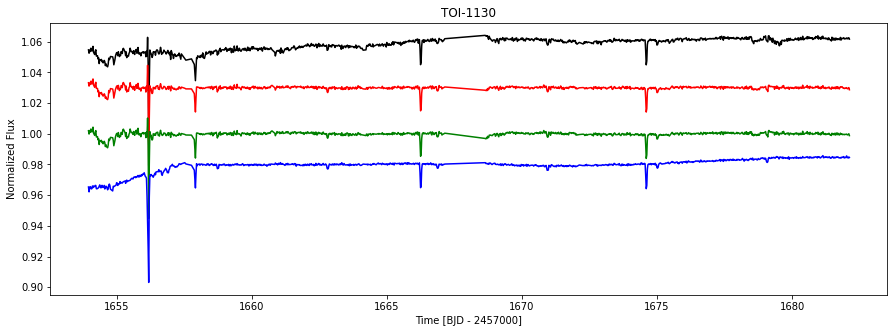

In [10]:
%matplotlib inline
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('TOI-1130');

In [11]:
data.bkg_type

'TPF_LEVEL'

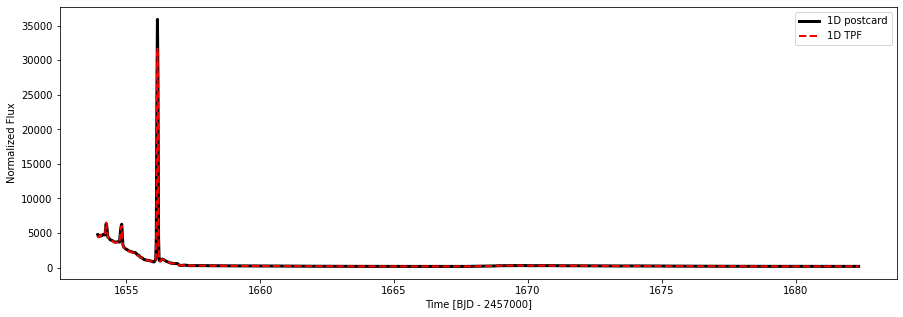

In [12]:
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend();

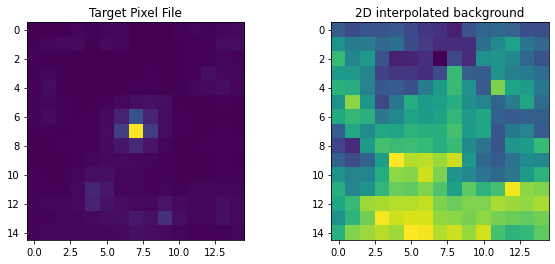

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

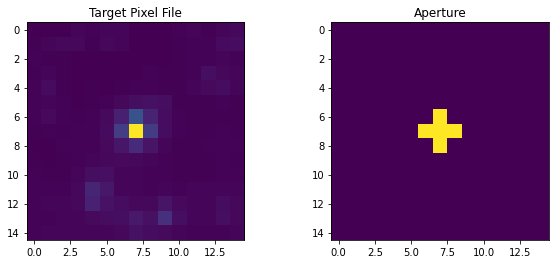

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.aperture)
ax2.set_title('Aperture');

In [16]:
data.save()

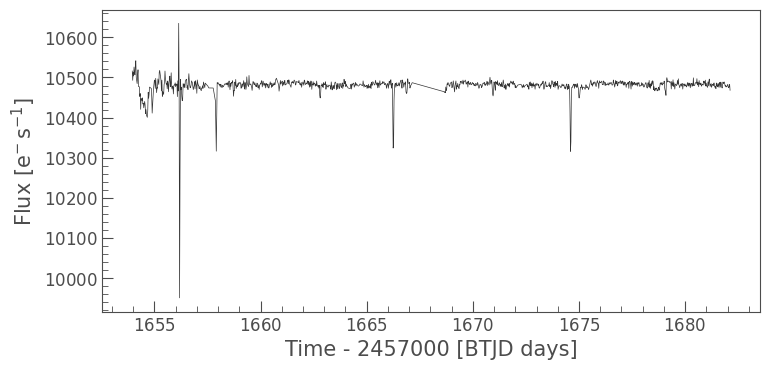

In [17]:
lk = data.to_lightkurve()
lk.plot()